## Import

In [ ]:
!pip install highway-env
!pip install git+https://github.com/DLR-RM/stable-baselines3

import gymnasium as gym
import highway_env
from stable_baselines3 import PPO

In [87]:
from stable_baselines3.common.evaluation import evaluate_policy

In [88]:
import matplotlib.pyplot as plt

In [90]:
import pprint

env = gym.make('highway-fast-v0')
pprint.pprint(env.config)

{'action': {'type': 'DiscreteMetaAction'},
 'centering_position': [0.3, 0.5],
 'collision_reward': -1,
 'controlled_vehicles': 1,
 'duration': 30,
 'ego_spacing': 1.5,
 'high_speed_reward': 0.4,
 'initial_lane_id': None,
 'lane_change_reward': 0,
 'lanes_count': 3,
 'manual_control': False,
 'normalize_reward': True,
 'observation': {'type': 'Kinematics'},
 'offroad_terminal': False,
 'offscreen_rendering': False,
 'other_vehicles_type': 'highway_env.vehicle.behavior.IDMVehicle',
 'policy_frequency': 1,
 'real_time_rendering': False,
 'render_agent': True,
 'reward_speed_range': [20, 30],
 'right_lane_reward': 0.1,
 'scaling': 5.5,
 'screen_height': 150,
 'screen_width': 600,
 'show_trajectories': False,
 'simulation_frequency': 5,
 'vehicles_count': 20,
 'vehicles_density': 1}


/usr/local/lib/python3.10/dist-packages/gymnasium/utils/passive_env_checker.py:42: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (5, 5)
  logger.warn(


## PPO

In [101]:
batch_size = 64

model = PPO("MlpPolicy",
                    env,
                    policy_kwargs=dict(net_arch=[dict(pi=[256, 256], vf=[256, 256])]), #additional keyword arguments to pass to the policy network constructor
                    n_steps=2048,
                    batch_size=batch_size,
                    n_epochs=10,
                    learning_rate=3e-4,
                    gamma=0.99,
                    verbose=2)

model.learn(total_timesteps=int(1e4))

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 10.7     |
|    ep_rew_mean     | 8.03     |
| time/              |          |
|    fps             | 15       |
|    iterations      | 1        |
|    time_elapsed    | 133      |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 14.8        |
|    ep_rew_mean          | 10.9        |
| time/                   |             |
|    fps                  | 15          |
|    iterations           | 2           |
|    time_elapsed         | 269         |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.014709489 |
|    clip_fraction        | 0.255       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.6        |
|    explained_variance   | -0.00808    |
|    learning_rate        | 0.

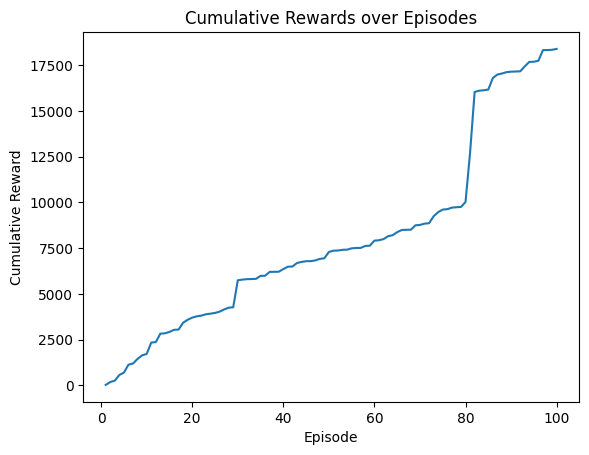

In [99]:
episodes = 100
rewards = []
cumulative_rewards = 0

for i in range(episodes):
    obs = env.reset()
    done = truncated = False
    episode_reward = 0
    
    while not done:
        action = int(model.predict(obs[0], deterministic=False)[0])
        next_obs, reward, done, truncated, info = env.step(action)
        episode_reward += reward
    
        cumulative_rewards += episode_reward
    rewards.append(cumulative_rewards)
    
plt.plot(range(1, episodes+1), rewards)
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Rewards over Episodes')
plt.show()

In [100]:
print(rewards[-1])

18388.009156442855


In [ ]:
mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=10, render=False)

print(f"Mean reward: {mean_reward:.4f}")
print(f"Std reward: {std_reward:.4f}")

/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(
